## Arbol elemental con libreria  rpart

Debe tener instaladas las librerias  data.table  ,  rpart   y rpart.plot

In [46]:
#cargo las librerias que necesito
require("data.table")
require("rpart")
require("rpart.plot")

Aqui se debe poner la carpeta de SU computadora local

In [47]:
setwd("/home/devsar/Documents/Austral/Laboratorio de Implementación")  #Establezco el Working Directory

cargo el dataset

In [48]:
dataset  <- fread("./datasets/competencia1_2022.csv")
dataset <- dataset[,clase_binaria:=ifelse(clase_ternaria=="CONTINUA", "NO", "SI")]
dataset[1:100, 150:156]

Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,clase_binaria
<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>
3997,18435.59,1,0,1337.22,CONTINUA,NO
NA,NA,NA,NA,NA,CONTINUA,NO
1573,12033.40,4,0,20011.38,CONTINUA,NO
2063,758.21,3,0,1302.03,CONTINUA,NO
5842,6316.13,1,0,4680.27,CONTINUA,NO
3121,37036.92,17,0,4093.77,CONTINUA,NO
4329,5630.78,12,0,2193.51,CONTINUA,NO
2147,20320.24,28,0,2252.16,CONTINUA,NO
3444,20214.55,9,0,3178.83,CONTINUA,NO


defino donde entreno y donde aplico el modelo

In [49]:
dtrain  <- dataset[ foto_mes==202101 ]  #defino donde voy a entrenar
dapply  <- dataset[ foto_mes==202103 ]  #defino donde voy a aplicar el modelo

genero el modelo,  aqui se construye el arbol

In [50]:
modelo  <- rpart(formula=    "clase_binaria ~ . -clase_ternaria", #quiero predecir clase_ternaria a partir de el resto de las variables
                 data =      dtrain,  #los datos donde voy a entrenar
                 xval=       0,
                 cp=        -1, #esto significa no limitar la complejidad de los splits
                 minsplit= 1100,   #minima cantidad de registros para que se haga el split
                 minbucket=  4,   #tamaño minimo de una hoja
                 maxdepth=  13 )  #PRUEBO  una profundidad de 10

Ahora grafico el arbol, va a ser muy frondoso porque la profundidad es de 10

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


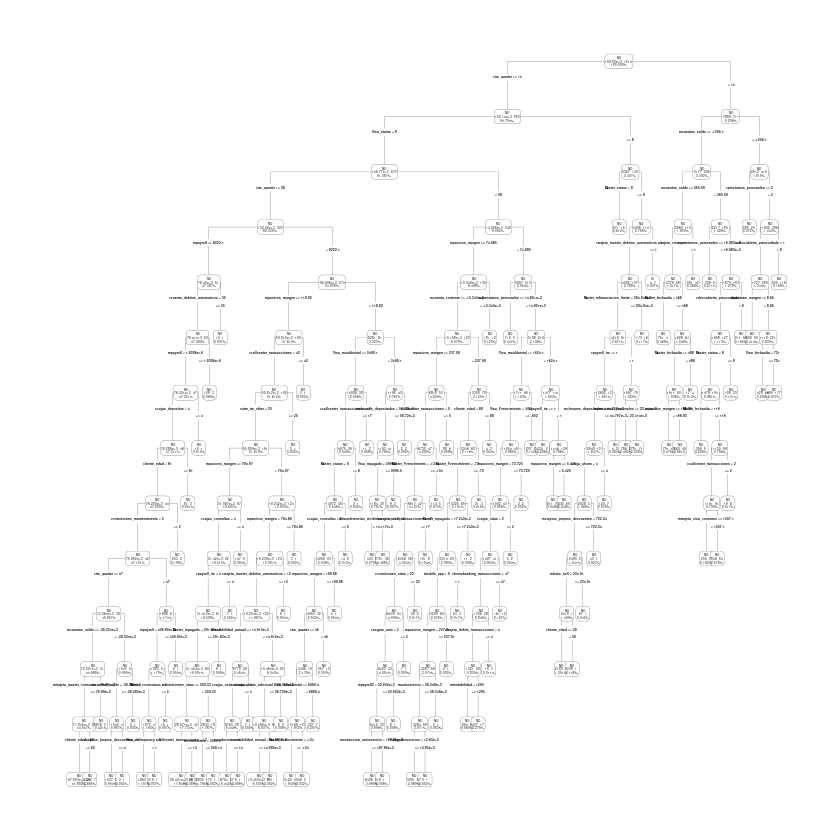

In [51]:
prp(modelo, extra=101, digits=5, branch=1, type=4, varlen=0, faclen=0)

Ahora aplico al modelo  a los datos muevos  y genero la salida para kaggle

aplico el modelo a los datos nuevos

In [52]:
prediccion  <- predict( modelo, dapply , type = "prob") #aplico el modelo

prediccion es una matriz con TRES columnas, llamadas "BAJA+1", "BAJA+2"  y "CONTINUA"
cada columna es el vector de probabilidades 

agrego a dapply una columna nueva que es la probabilidad de BAJA+2

In [53]:
dapply[ , prob_baja2 := prediccion[, "SI"] ]

solo le envio estimulo a los registros con probabilidad de BAJA+2 mayor  a  1/40

In [54]:
dapply[ , Predicted  := as.numeric(prob_baja2 > 0.039) ]

Finalmente genero el archivo para Kaggle

creo la carpeta donde va el experimento

In [55]:
dir.create( "./exp/KA2002" ) 

Warning message in dir.create("./exp/KA2002"):
“'./exp/KA2002' already exists”


grabo el dataset

In [56]:
fwrite( dapply[ , list(numero_de_cliente, Predicted) ], #solo los campos para Kaggle
        file= "./exp/KA2002/KA2002_001_BINARIO_5.csv", 
        sep= "," )